In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('customer_segmentation.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.isnull().any().sum()

1

In [5]:
df = df.dropna()
df = df.drop(columns=['ID', 'Dt_Customer'])

In [6]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [11]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [12]:
def plot_histogram(df):
    """
    Plots a histogram for the 'Year_Birth' column of the DataFrame.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    """
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['Year_Birth'], bins=20, color='skyblue', edgecolor='black') # Plotting the Histogram for Year Birth column
    plt.title('Histogram of Year of Birth') # Adding a title to the plot
    plt.xlabel('Year of Birth') # Labelling the X-Axis
    plt.ylabel('Frequency') # Labelling the Y-Axis
    plt.show() # Show Plot

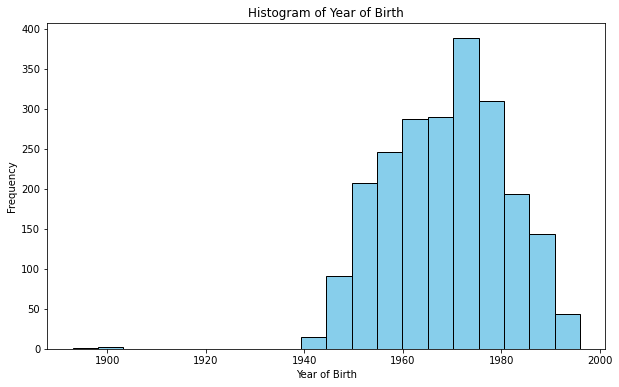

In [13]:
plot_histogram(df)

In [14]:
df['Year_Birth'].describe()

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [15]:
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [29]:
df['Total_Spent'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total_Spent, dtype: float64

In [28]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [24]:
def plot_scatter(df):
    """
    Plot a scatter plot between 'Total_Spent' and 'Income' columns of the DataFrame.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    """
    # Plot scatter plot
    plt.figure(figsize=(10, 6)) # Setting the figure size
    plt.scatter(df['Income'], df['Total_Spent'], color='blue', alpha=0.7) # Plotting a scatter plot between total amount spent and income of each individual
    plt.title('Scatter Plot of Total Spent vs Income') # Adding a title to the plot
    plt.xlabel('Income')  # Labelling the X-Axis
    plt.ylabel('Total Spent')  # Labelling the Y-Axis
    plt.show() # Show Plot

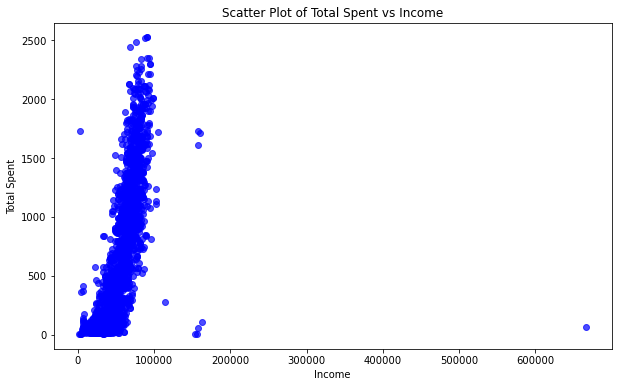

In [25]:
plot_scatter(df)

In [26]:
def plot_correlation_heatmap(df):
    """
    Plot a correlation heatmap for the DataFrame.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    """
    corr_matrix = df.corr() # Calculating correlation matrix
    plt.figure(figsize=(15, 12)) # Setting the figure size
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}) # Ploting the heatmap
    plt.title('Correlation Heatmap') # Adding a title to the plot
    plt.show() # Show Plot

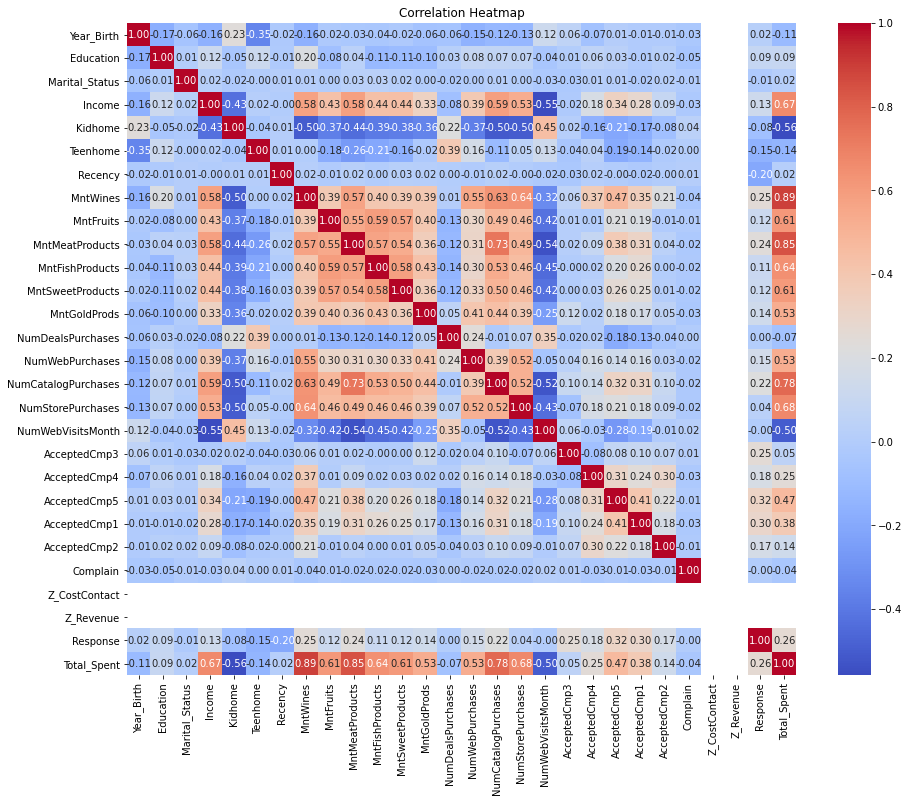

In [27]:
plot_correlation_heatmap(df)

## Clustering

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [51]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Income', 'Total_Spent']])

# Determining the optimal number of clusters using silhouette score
max_clusters = 10
silhouette_scores = []
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

In [52]:
def plot_silhouette_scores(silhouette_scores, max_clusters):
    """
    Plot the silhouette scores to select the optimal number of clusters.

    Parameters:
    silhouette_scores (list): A list of silhouette scores for different numbers of clusters.
    max_clusters (int): The maximum number of clusters considered.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(False)
    plt.show()

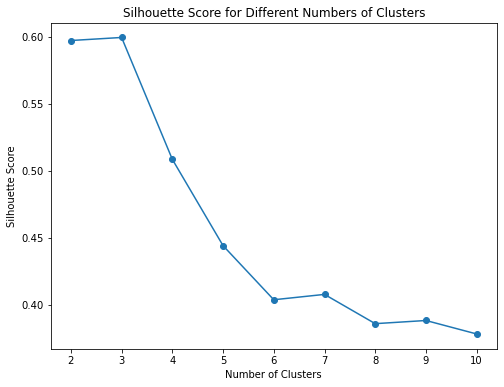

In [53]:
plot_silhouette_scores(silhouette_scores, max_clusters)

Optimal number of clusters: 3


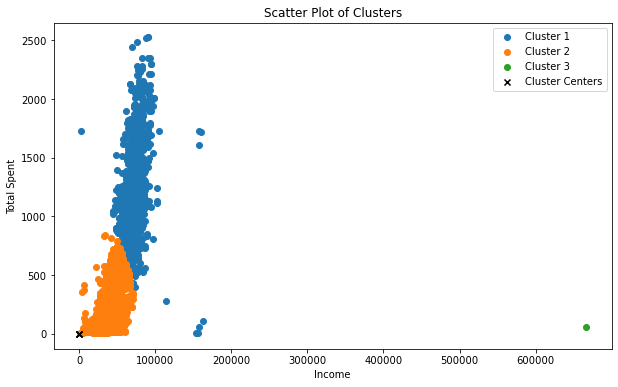

In [56]:
optimal_num_clusters = np.argmax(silhouette_scores) + 2
print("Optimal number of clusters:", optimal_num_clusters)
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
for i in range(optimal_num_clusters):
    plt.scatter(df['Income'][cluster_labels == i], df['Total_Spent'][cluster_labels == i], label=f'Cluster {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.legend()
plt.grid(False)
plt.show()

## Line Fitting

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
x = df[['Income']]; y = df['Total_Spent']

model = LinearRegression()
model.fit(x, y)

LinearRegression()

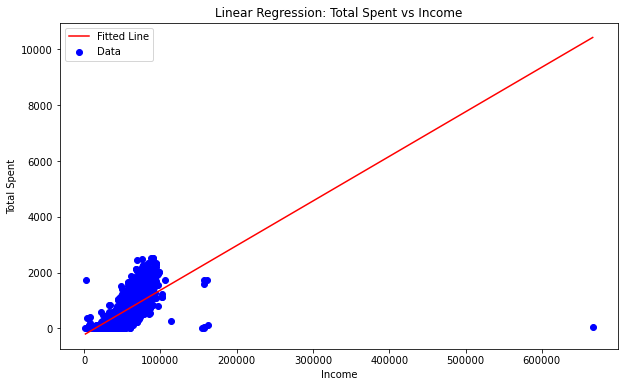

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
x_values = np.linspace(min(x.values), max(x.values), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', label='Fitted Line')
plt.title('Linear Regression: Total Spent vs Income')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.legend()
plt.show()

In [71]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: -228.2843973199973
Coefficient: 0.015988587661276484
